In [94]:
import numpy as np
import matplotlib.pyplot as plt
from utils.utils import get_path, get_close_spec_params
from vis_utils.loaders import load_dataset
from tsne_slider.spectra import TSNESpectrum, CNESpectrum
import os

In [95]:
seeds = [0, 1, 2]
n_slides = 60
min_exagg = 0.85
max_exagg = 30

dataset = "human-409b2"

In [96]:
root_path = get_path("data")
style_path = get_path("style")
fig_path = root_path + "/figures"
plt.style.use(style_path)

In [97]:
x, y,_,_, d = load_dataset(root_path=root_path, dataset=dataset, k=15)

In [99]:
def load_metrics(spectrum_via):
    k = 15

    file_name_recalls = f"human-409b2_{spectrum_via}_n_slides_{n_slides}_min_spec_{min_exagg}_max_spec_{max_exagg}_recalls_k_{k}.npy"

    recalls = np.load(os.path.join(root_path, dataset, file_name_recalls))

    sub_sample = len(x)

    file_name_spears= f"human-409b2_{spectrum_via}_n_slides_{n_slides}_min_spec_{min_exagg}_max_spec_{max_exagg}_spear_sum_sample_{sub_sample}.npy"

    spears = np.load(os.path.join(root_path, dataset, file_name_spears))
    
    return recalls, spears

In [100]:
def plot_metric_figure(recalls, spears, computed_spec_params, close_spec_params, spectrum_via):
    fig, ax = plt.subplots(1, 2, figsize=(3, 1.), constrained_layout=True)
    
    metric_names = ["$k$NN recall", "Spearman"]
    
    titles = ["Neighbor preservation", "Distance preservation"]
    
    
    labels = ["t-SNE", r"$\approx$UMAP", r"$\approx$FA"]
    label_offsets = [[[0.4,-0.01], [-4, -0.05], [-15, 0.02]],
                     [[0.2, -0.03], [-4, 0.01], [-15, 0.02]]]
    
    for i, metric in enumerate([recalls, spears]):
        mean = metric.mean(0)
        std = metric.std(0)
        
        ax[i].scatter(close_spec_params[1::2], mean[idx[1::2]], color="k")
        ax[i].scatter(close_spec_params[::2], mean[idx[::2]], color="k", marker="s", s=4.0)
        ax[i].plot(computed_spec_params, mean, color="k")
        for j in range(3):
            ax[i].text(s=labels[j], x=close_spec_params[2*j]+label_offsets[i][j][0], y=mean[idx[2*j]]+label_offsets[i][j][1], fontsize=7)       
        
        ax[i].fill_between(computed_spec_params, mean-std, mean+std, alpha=0.2, color="k")
        ax[i].set_xscale("log")
        ax[i].text(s=metric_names[i], x=-0.4, y=0.5, rotation=90, va="center", transform=ax[i].transAxes, fontsize=7)
        ax[i].spines['left'].set_position(('outward', 5))
        ax[i].spines['bottom'].set_position(('outward', 5))
        ax[i].set_xticks([])
        ax[i].minorticks_off()
        #ax[i].set_xlabel("Spectrum")
        ax[i].set_xlabel("Repulsion           Attraction")
        ax[i].set_title(titles[i])
               
        y_ticks = np.arange(np.floor(mean.min() * 20)/20, np.ceil(mean.max()*20)/20+0.00001, 0.05)
    
        ax[i].set_yticks(y_ticks)
        ax[i].spines['bottom'].set_visible(False)
        
        ax[i].annotate('', xy=(1.01, -0.1), xytext=(-0.01, -0.1), xycoords=ax[i].transAxes, textcoords=ax[i].transAxes,
                arrowprops=dict(arrowstyle="<->", color='k', linewidth=0.5))
    
    
    fig.savefig(os.path.join(fig_path, f"local_global_metrics_{spectrum_via}.png"), dpi=300)

# tsne spectrum

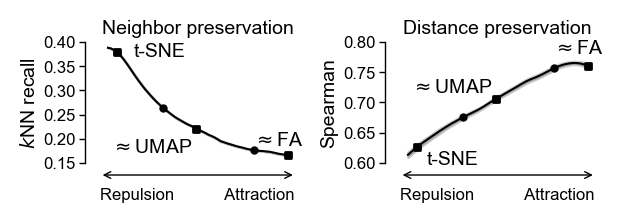

In [101]:
selected_exagg = np.array([30, 15, 5, 2.5, 1])[::-1]
spectrum_via = "tsne"

close_exaggs, _, computed_exagg = get_close_spec_params(selected_exagg, spectrum_via)

recalls, spears = load_metrics(spectrum_via)

plot_metric_figure(recalls, spears, computed_exagg, close_exaggs, spectrum_via)

# cne spectrum

In [ ]:
selected_s = np.array([2, 1.5, 1, 0.5, 0.0])[::-1]
spectrum_via = "cne"

close_s, _, computed_s = get_close_spec_params(selected_s, spectrum_via)

recalls, spears = load_metrics(spectrum_via)

plot_metric_figure(recalls, spears, computed_s, close_s, spectrum_via)